<h2 style='text-align:center'>Classification with TensorFlow</h2>

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Generate the data

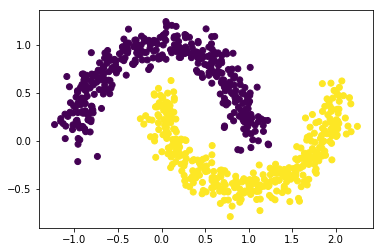

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=750, noise=0.1, random_state=42)
x1 = [ x[0] for x in X]
x2 = [ x[1] for x in X]

plt.scatter(x1, x2, c=y)

In [3]:
y = pd.DataFrame(data=y, columns=['Target'])
y[:5]

,Target
0,1
1,0
2,0
3,0
4,0


In [4]:
#adding more features

data = pd.DataFrame(data=X, columns=['x1', 'x2'])
data['x1_square'] = data['x1']**2
data['x2_square'] = data['x2']**2
data['x1_x2_product'] = data['x2']*data['x1']
data[:5]

,x1,x2,x1_square,x2_square,x1_x2_product
0,0.494967,-0.302105,0.244992,0.091267,-0.149532
1,-1.046147,0.396241,1.094424,0.157007,-0.414526
2,0.577883,0.859885,0.333948,0.739402,0.496913
3,-0.389880,0.915733,0.152006,0.838567,-0.357026
4,-0.784682,0.669409,0.615726,0.448108,-0.525273


In [6]:
data[['x1','x2']][:5]

,x1,x2
0,0.494967,-0.302105
1,-1.046147,0.396241
2,0.577883,0.859885
3,-0.389880,0.915733
4,-0.784682,0.669409


### Split train/test data

In [7]:
#shuffle and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.25, random_state=42)
X_train[:5]

,x1,x2,x1_square,x2_square,x1_x2_product
557,-0.089552,0.934165,0.008020,0.872663,-0.083656
480,0.813407,-0.446459,0.661631,0.199325,-0.363152
451,0.352464,-0.209874,0.124231,0.044047,-0.073973
332,0.545320,0.712846,0.297374,0.508149,0.388729
730,-0.891588,0.633522,0.794929,0.401350,-0.564840


In [8]:
y_train[:4]

,Target
557,0
480,1
451,1
332,0


#### Prepare Data for NN

In [9]:
#Prepare data for NN
X_train, y_train = X_train.as_matrix(), y_train.as_matrix()
X_test, y_test = X_test.as_matrix(), y_test.as_matrix()

In [13]:
y_train[:5]

array([[0],
       [1],
       [1],
       [0],
       [0]])

In [9]:
#each class needs one column
def one_encoded(X):
    res = []
    for i in X:
        res.append([i[0], -(i[0]-1)])
    return res
        
y_train = np.array(one_encoded(y_train))
y_test = np.array(one_encoded(y_test))

In [66]:
y_train[:10]

array([[0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

## Create the NN

In [11]:
import tensorflow as tf

In [12]:
# Parameters
n_classes = 2
num_features = 5
learning_rate = 0.03
training_epochs = 10
batch_size = 100
display_step = 1

Graph

In [53]:
# Input
X = tf.placeholder(tf.float32, [None, num_features], name='X_input')
y = tf.placeholder("float", [None, n_classes])

# hidden layer 1
w_1 = tf.Variable(tf.random_normal([num_features, 6]))
h_1 = tf.nn.tanh(tf.matmul(X, w_1))

# hidden layer 2
w_2 = tf.Variable(tf.random_normal([6, 6]))
h_2 = tf.nn.tanh(tf.matmul(h_1, w_2))

# hidden layer 3
w_3 = tf.Variable(tf.random_normal([6, 6]))
h_3 = tf.nn.tanh(tf.matmul(h_2, w_3))

# hidden layer 4
w_4 = tf.Variable(tf.random_normal([6, 6]))
h_4 = tf.nn.tanh(tf.matmul(h_3, w_4))

# hidden layer 5
w_5 = tf.Variable(tf.random_normal([6, 6]))
h_5 = tf.nn.tanh(tf.matmul(h_4, w_5))

# output layer
w_6 = tf.Variable(tf.random_normal([6, n_classes]))

# prediction
y_pred = tf.matmul(h_5, w_6)


# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Run

In [75]:
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(X_train)/batch_size)
        X_batches = np.array_split(X_train, total_batch)
        Y_batches = np.array_split(y_train, total_batch)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = X_batches[i], Y_batches[i]
            # batch_y.shape = (batch_y.shape[0], 1)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmin(y_pred, 1), tf.argmin(y, 1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: X_test, y: y_test}))
#     global result 
#     result = tf.argmax(y_pred, 1).eval({X: X_test, y: y_test})1
    result = tf.argmin(y_pred, 1) 
    print(result.eval(feed_dict={X: X_test[:10]}))

Epoch: 0001 cost= 0.647447258
Epoch: 0002 cost= 0.340163735
Epoch: 0003 cost= 0.201892975
Epoch: 0004 cost= 0.120505939
Epoch: 0005 cost= 0.074972302
Epoch: 0006 cost= 0.066854143
Epoch: 0007 cost= 0.056606572
Epoch: 0008 cost= 0.062769960
Epoch: 0009 cost= 0.049552463
Epoch: 0010 cost= 0.042723289
Optimization Finished!
Accuracy: 0.978723
[1 1 0 0 0 0 0 0 1 0]


In [68]:
y_test[:10]

array([[1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1]])

### Keras

In [260]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

seed = 7
numpy.random.seed(seed)

# load pima indians dataset
# dataset = numpy.loadtxt("datasets/pima-indians-diabetes.data", delimiter=",")

# split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]


# print(X.shape)
# create model
model = Sequential()
model.add(Dense(6, input_dim=5, init='uniform', activation='tanh'))
model.add(Dense(6, init='uniform', activation='tanh'))
model.add(Dense(6, init='uniform', activation='tanh'))
model.add(Dense(6, init='uniform', activation='tanh'))
model.add(Dense(6, init='uniform', activation='tanh'))
model.add(Dense(6, init='uniform', activation='tanh'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
    

a = model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, nb_epoch=150, batch_size=10)

# evaluate the model
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



Epoch 1/150
562/562 [==============================] - 0s - loss: 0.6933 - acc: 0.5018     
Epoch 2/150
562/562 [==============================] - 0s - loss: 0.6932 - acc: 0.5053     
Epoch 3/150
562/562 [==============================] - 0s - loss: 0.6839 - acc: 0.6335     
Epoch 4/150
562/562 [==============================] - 0s - loss: 0.5069 - acc: 0.8399     
Epoch 5/150
562/562 [==============================] - 0s - loss: 0.3939 - acc: 0.8594     
Epoch 6/150
562/562 [==============================] - 0s - loss: 0.3609 - acc: 0.8737     
Epoch 7/150
562/562 [==============================] - 0s - loss: 0.3490 - acc: 0.8701     
Epoch 8/150
562/562 [==============================] - 0s - loss: 0.3404 - acc: 0.8701     
Epoch 9/150
562/562 [==============================] - 0s - loss: 0.3338 - acc: 0.8772     
Epoch 10/150
562/562 [==============================] - 0s - loss: 0.3295 - acc: 0.8701     
Epoch 11/150
562/562 [==============================] - 0s - loss: 0.3241 - acc